<a href="https://colab.research.google.com/github/karinaortega1507/Analisis-de-Datos/blob/main/correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
## Leer CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
%matplotlib inline
import seaborn as sns
data = pd.read_csv('sample_data/filtro.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ECU,South America,Ecuador,2020-03-01,6,6,NaN,NaN,NaN,NaN,0.335,0.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,17888474,66.939,28.1,7.104,4.458,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759,-261.9,-1.94,2.3,-14.640712
1,ECU,South America,Ecuador,2020-03-02,6,0,NaN,NaN,NaN,NaN,0.335,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,17888474,66.939,28.1,7.104,4.458,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759,NaN,NaN,NaN,NaN
2,ECU,South America,Ecuador,2020-03-03,7,1,NaN,NaN,NaN,NaN,0.391,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,17888474,66.939,28.1,7.104,4.458,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759,NaN,NaN,NaN,NaN
3,ECU,South America,Ecuador,2020-03-04,10,3,NaN,NaN,NaN,NaN,0.559,0.168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,17888474,66.939,28.1,7.104,4.458,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759,NaN,NaN,NaN,NaN
4,ECU,South America,Ecuador,2020-03-05,13,3,NaN,NaN,NaN,NaN,0.727,0.168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,17888474,66.939,28.1,7.104,4.458,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759,NaN,NaN,NaN,NaN


In [12]:
data.shape

(636, 67)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    636 non-null    object 
 1   continent                                   636 non-null    object 
 2   location                                    636 non-null    object 
 3   date                                        636 non-null    object 
 4   total_cases                                 636 non-null    int64  
 5   new_cases                                   636 non-null    int64  
 6   new_cases_smoothed                          631 non-null    float64
 7   total_deaths                                623 non-null    float64
 8   new_deaths                                  621 non-null    float64
 9   new_deaths_smoothed                         631 non-null    float64
 10  total_cases_pe

In [14]:
# La función describe me permite ver valores estadiscticos de la variable, y la T es para realizar la transpuesta
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,636.0,257099.745283,1.808250e+05,6.000000,91611.000000,223441.000000,446489.000000,524432.000000
new_cases,636.0,824.578616,9.630621e+02,-7953.000000,199.000000,717.500000,1189.250000,11536.000000
new_cases_smoothed,631.0,830.820231,5.125832e+02,-525.000000,436.785500,844.571000,1116.500000,2273.286000
total_deaths,623.0,15802.293740,1.043369e+04,2.000000,6076.500000,14382.000000,21372.000000,33128.000000
new_deaths,621.0,32.995169,4.901486e+01,0.000000,7.000000,22.000000,44.000000,752.000000
...,...,...,...,...,...,...,...,...
human_development_index,636.0,0.759000,3.222181e-15,0.759000,0.759000,0.759000,0.759000,0.759000
excess_mortality_cumulative_absolute,89.0,41773.057303,1.915062e+04,-462.700000,29853.500000,39669.500000,61802.700000,66486.500000
excess_mortality_cumulative,89.0,53.236966,1.460273e+01,-2.790000,50.990000,54.430000,62.590000,69.440000
excess_mortality,89.0,50.858989,5.722086e+01,-8.280000,19.970000,38.080000,62.840000,373.740000


In [15]:
#Descripcion de variables categóricas
data.describe(include='O')

,iso_code,continent,location,date,tests_units
count,636,636,636,636,615
unique,1,1,1,636,1
top,ECU,South America,Ecuador,2020-12-29,people tested
freq,636,636,636,1,615


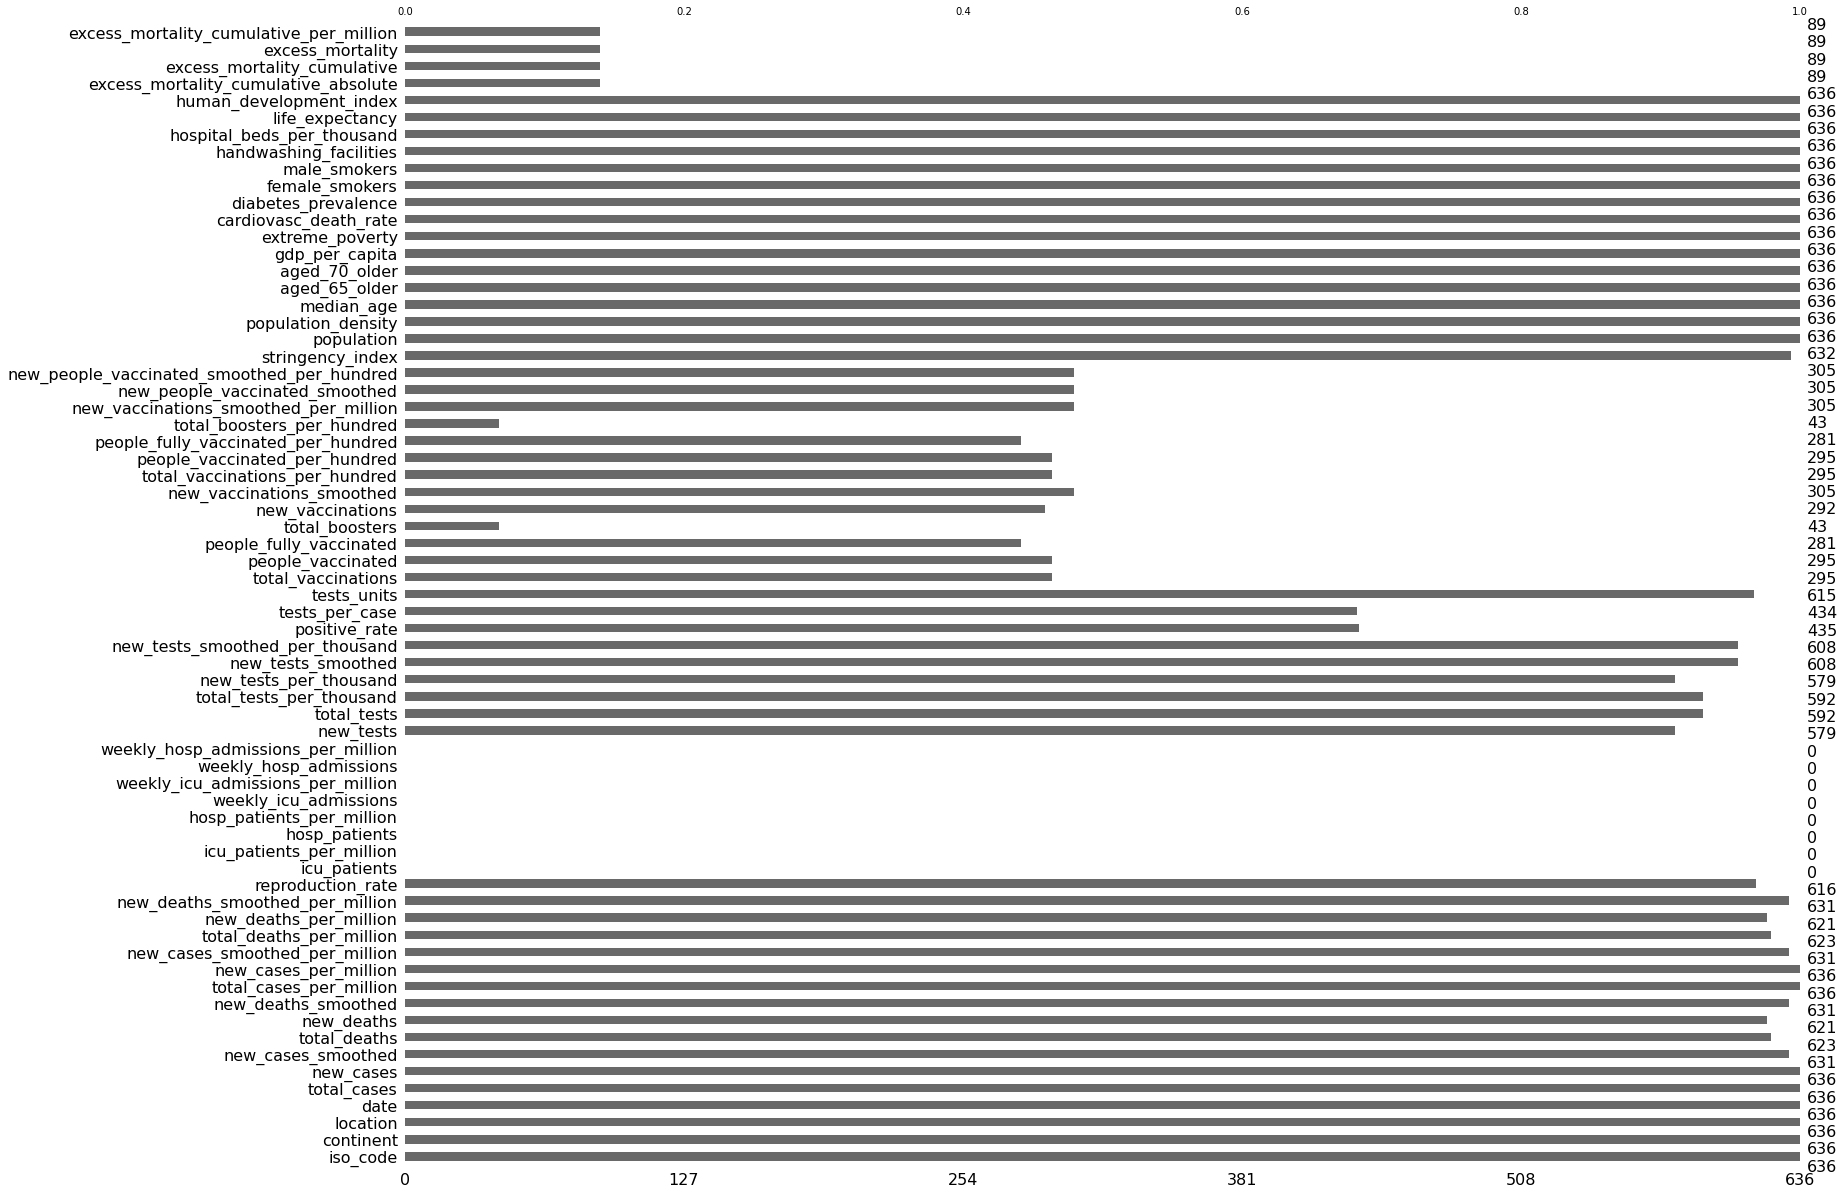

In [16]:
msno.bar(data)

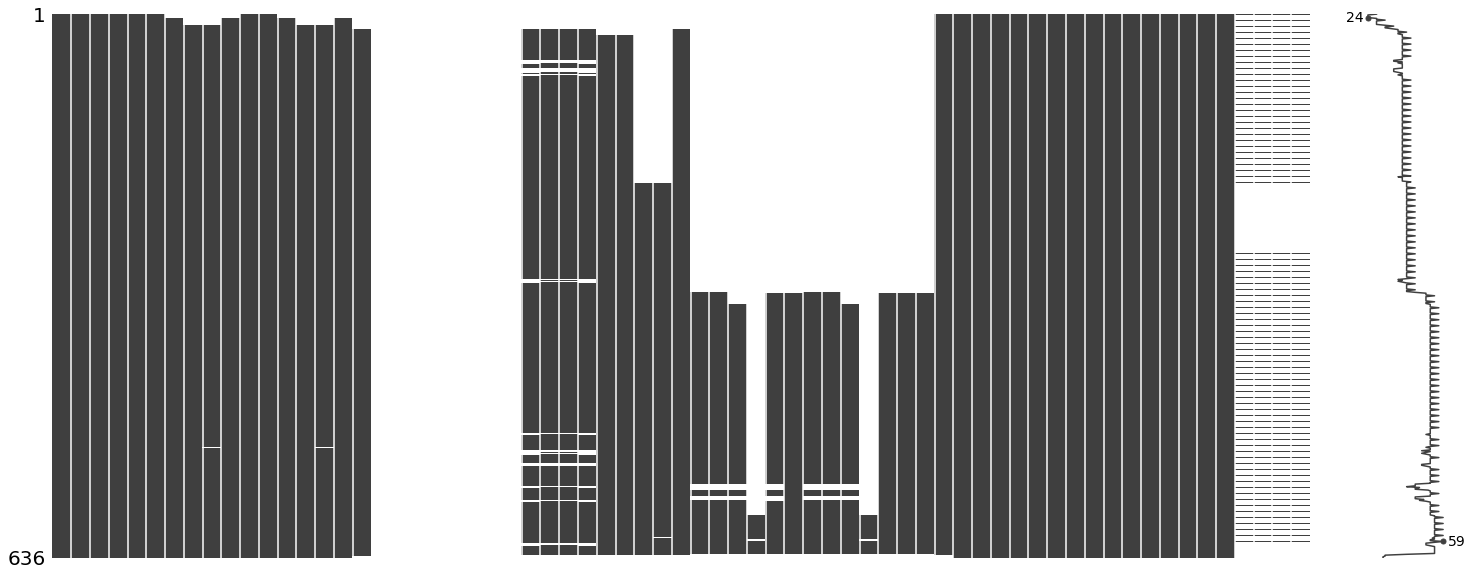

In [17]:
msno.matrix(data)

In [30]:
dataclean = data.drop(['icu_patients', 'tests_units', 'total_boosters', 'icu_patients_per_million', 'total_boosters_per_hundred', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'], axis=1)

In [31]:
dataclean.mean()

total_cases                                   2.570997e+05
new_cases                                     8.245786e+02
new_cases_smoothed                            8.308202e+02
total_deaths                                  1.580229e+04
new_deaths                                    3.299517e+01
new_deaths_smoothed                           3.246842e+01
total_cases_per_million                       1.437237e+04
new_cases_per_million                         4.609553e+01
new_cases_smoothed_per_million                4.644445e+01
total_deaths_per_million                      8.833785e+02
new_deaths_per_million                        1.844496e+00
new_deaths_smoothed_per_million               1.815036e+00
reproduction_rate                             1.028555e+00
new_tests                                     3.143169e+03
total_tests                                   8.424902e+05
total_tests_per_thousand                      4.709683e+01
new_tests_per_thousand                        1.757202e-

In [37]:
dataclean = dataclean.fillna(dataclean.mean())

In [38]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    636 non-null    object 
 1   continent                                   636 non-null    object 
 2   location                                    636 non-null    object 
 3   date                                        636 non-null    object 
 4   total_cases                                 636 non-null    int64  
 5   new_cases                                   636 non-null    int64  
 6   new_cases_smoothed                          636 non-null    float64
 7   total_deaths                                636 non-null    float64
 8   new_deaths                                  636 non-null    float64
 9   new_deaths_smoothed                         636 non-null    float64
 10  total_cases_pe

In [43]:
#Tomar columnas numéricas
arreglo = list(dataclean.columns)
columnas_numericas = dataclean[arreglo[4:len(arreglo)]]
columnas_numericas.round(0).astype(int)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,6,6,831,15802,33,32,0,0,46,883,2,2,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,6,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,-262,-2,2,-15
1,6,0,831,15802,33,32,0,0,46,883,2,2,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,8,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
2,7,1,831,15802,33,32,0,0,46,883,2,2,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,8,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
3,10,3,831,15802,33,32,1,0,46,883,2,2,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,8,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
4,13,3,831,15802,33,32,1,0,46,883,2,2,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,8,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,524353,506,366,33125,4,5,29312,28,20,1852,0,0,1,866,1889913,106,0,3244,0,0,9,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,58,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
632,524432,79,377,33128,3,6,29317,4,21,1852,0,0,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,67,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
633,524432,0,377,33128,0,6,29317,0,21,1852,0,0,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,67,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335
634,524432,0,377,33128,0,6,29317,0,21,1852,0,0,1,3143,842490,47,0,3094,0,0,6,8564827,5238749,3580456,80195,78138,48,29,20,4368,43529,0,67,17888474,67,28,7,4,10582,4,140,6,2,12,81,2,77,1,41773,53,51,2335


In [49]:
matriz_correlacion=columnas_numericas.corr('pearson').round(4)
matriz_correlacion


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.0000,0.0289,0.0626,0.9478,-0.0873,-0.1309,1.0000,0.0289,0.0626,0.9478,-0.0873,-0.1309,-0.6848,0.2293,0.9335,0.9335,0.2291,0.3778,0.3777,-0.2337,0.1671,0.2944,0.3057,0.2458,0.1721,0.1874,0.2944,0.3057,0.2458,0.1874,0.1166,0.1166,-0.3460,NaN,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,NaN,0.0,0.0,NaN,-0.0,0.0,0.3575,0.0122,-0.1313,0.3575
new_cases,0.0289,1.0000,0.5295,-0.0657,0.3716,0.2340,0.0289,1.0000,0.5295,-0.0657,0.3716,0.2340,0.0117,0.5977,0.0278,0.0278,0.5977,0.3598,0.3596,0.3876,-0.1825,-0.3509,-0.3490,-0.3349,-0.1034,-0.1330,-0.3509,-0.3490,-0.3349,-0.1330,-0.0347,-0.0348,0.0377,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,NaN,-0.0,-0.0,NaN,0.0,-0.0,0.0457,0.0517,0.0216,0.0457
new_cases_smoothed,0.0626,0.5295,1.0000,-0.0998,0.1822,0.4082,0.0626,0.5295,1.0000,-0.0998,0.1822,0.4082,-0.0300,0.4412,0.0324,0.0324,0.4412,0.6798,0.6799,0.7252,-0.3321,-0.6528,-0.6458,-0.6251,-0.2207,-0.2402,-0.6528,-0.6458,-0.6251,-0.2402,-0.0503,-0.0504,-0.0068,NaN,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,NaN,-0.0,-0.0,NaN,-0.0,-0.0,0.0710,0.1012,0.0689,0.0710
total_deaths,0.9478,-0.0657,-0.0998,1.0000,-0.1212,-0.2248,0.9478,-0.0657,-0.0998,1.0000,-0.1212,-0.2248,-0.7353,0.1863,0.9176,0.9176,0.1861,0.3078,0.3076,-0.3784,0.2236,0.4588,0.4684,0.4109,0.2042,0.2368,0.4588,0.4684,0.4109,0.2368,0.1046,0.1046,-0.5110,NaN,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,NaN,-0.0,-0.0,NaN,-0.0,-0.0,0.3240,-0.0335,-0.1746,0.3240
new_deaths,-0.0873,0.3716,0.1822,-0.1212,1.0000,0.4881,-0.0873,0.3716,0.1822,-0.1212,1.0000,0.4881,0.0127,0.2051,-0.0707,-0.0707,0.2051,0.0467,0.0466,0.2368,-0.1143,-0.1967,-0.1805,-0.2104,0.0145,-0.0284,-0.1967,-0.1805,-0.2104,-0.0284,0.0167,0.0167,0.1003,NaN,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,NaN,0.0,0.0,NaN,0.0,0.0,-0.0484,0.0610,0.0341,-0.0484
new_deaths_smoothed,-0.1309,0.2340,0.4082,-0.2248,0.4881,1.0000,-0.1309,0.2340,0.4082,-0.2248,0.4881,1.0000,-0.0086,0.1111,-0.1362,-0.1362,0.1111,0.0893,0.0894,0.4843,-0.2212,-0.3746,-0.3429,-0.4021,-0.0585,-0.0565,-0.3746,-0.3429,-0.4021,-0.0565,0.0222,0.0222,0.2308,NaN,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,NaN,0.0,0.0,NaN,0.0,0.0,-0.0052,0.1479,0.0685,-0.0052
total_cases_per_million,1.0000,0.0289,0.0626,0.9478,-0.0873,-0.1309,1.0000,0.0289,0.0626,0.9478,-0.0873,-0.1309,-0.6848,0.2293,0.9335,0.9335,0.2291,0.3778,0.3777,-0.2337,0.1671,0.2944,0.3057,0.2458,0.1721,0.1874,0.2944,0.3057,0.2458,0.1874,0.1166,0.1166,-0.3460,NaN,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,NaN,-0.0,-0.0,NaN,-0.0,-0.0,0.3575,0.0122,-0.1313,0.3575
new_cases_per_million,0.0289,1.0000,0.5295,-0.0657,0.3716,0.2340,0.0289,1.0000,0.5295,-0.0657,0.3716,0.2340,0.0117,0.5977,0.0278,0.0278,0.5977,0.3598,0.3596,0.3876,-0.1825,-0.3509,-0.3490,-0.3349,-0.1034,-0.1330,-0.3509,-0.3490,-0.3349,-0.1330,-0.0347,-0.0348,0.0377,NaN,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0457,0.0517,0.0216,0.0457
new_cases_smoothed_per_million,0.062

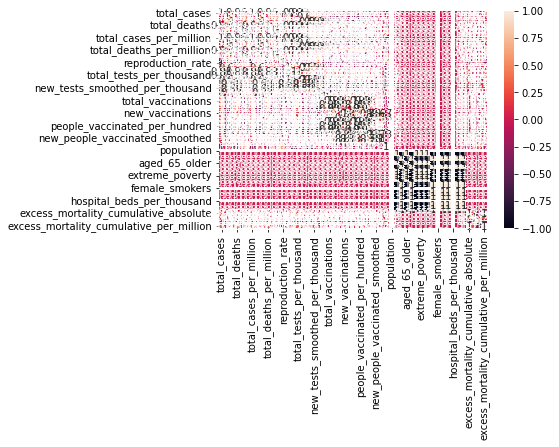

In [50]:
sns.heatmap(matriz_correlacion, annot = True)

plt.show()